# Analyzing Machine Learning Models with Yellowbrick
[Reference](https://heartbeat.fritz.ai/analyzing-machine-learning-models-with-yellowbrick-37795733f3ee)

The **Yellowbrick** library is a diagnostic visualization platform for machine learning that allows data scientists to steer the model selection process and assist in diagnosing problems throughout the machine learning workflow. In short, it tries to find a model described by a triple composed of features, an algorithm, and hyperparameters that best fit the data.

In [1]:
#via pip
!pip install yellowbrick

![alt text](https://miro.medium.com/max/1400/1*3zNcu8BnQDQ8KSTd8_6miw.png)

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.features import Rank1D
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Read the data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/parulnith/Analysing-Machine-Learning-Models-with-Yellowbrick/master/data/occupancy/occupancy.csv')
df.head()

,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:
feature_names = ['temperature', 'relative humidity', 'light', 'C02','humidity']
target_name = 'occupancy'
X = df[feature_names].to_numpy()
y = df[target_name].to_numpy()

## Feature Analysis with Yellowbrick

![alt text](https://miro.medium.com/max/1282/1*_bebdhecZRjZp-eFAXLTlQ.png)

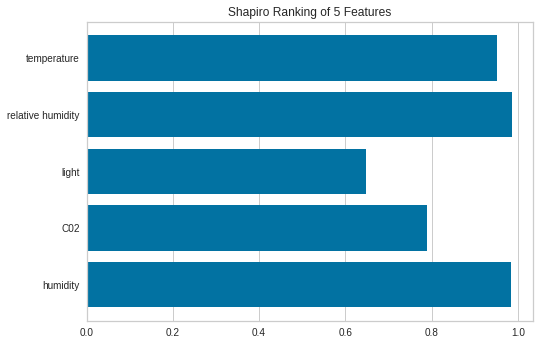

In [5]:
visualizer = Rank1D(features=feature_names, algorithm='shapiro')
visualizer.fit(X, y)                # Fit
visualizer.transform(X)             # Transform
visualizer.poof()                   # Visualise

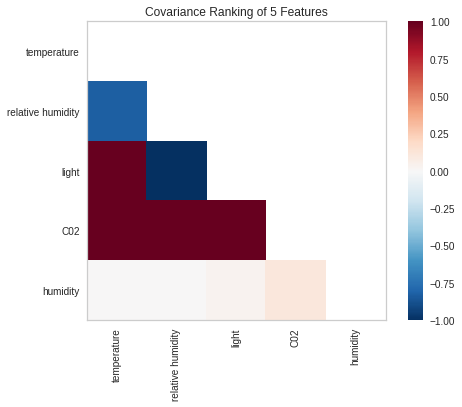

In [6]:
from yellowbrick.features import Rank2D
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=feature_names, algorithm='covariance') 
#visualizer = Rank2D(features=feature_names, algorithm='pearson')
visualizer.fit(X, y)                
visualizer.transform(X)             
visualizer.poof()

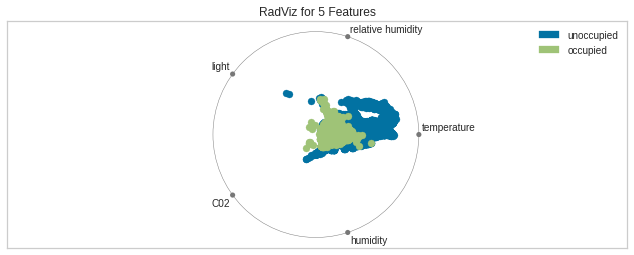

In [7]:
from yellowbrick.features import RadViz
# Specify the features of interest and the classes of the target 
features = feature_names
classes = ['unoccupied', 'occupied']
# Instantiate the visualizer
visualizer = visualizer = RadViz(classes=classes, features=features,size = (800,300))
visualizer.fit(X, y)      
visualizer.transform(X)  
visualizer.poof()

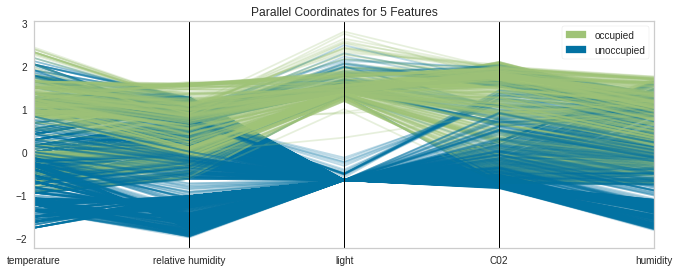

In [8]:
from yellowbrick.features import ParallelCoordinates
features = feature_names
classes = ['unoccupied', 'occupied']
# Instantiate the visualizer
visualizer = visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', sample=0.1, size = (800,300)
)
visualizer.fit(X, y)     
visualizer.transform(X)   
visualizer.poof()

## Model Evaluation Visualizers

In [9]:
# Classifier Evaluation Imports 

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ClassificationReport,ConfusionMatrix

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

- precision = true positives / (true positives + false positives)
- recall = true positives / (false negatives + true positives)
- F1 score = 2 * ((precision * recall) / (precision + recall))

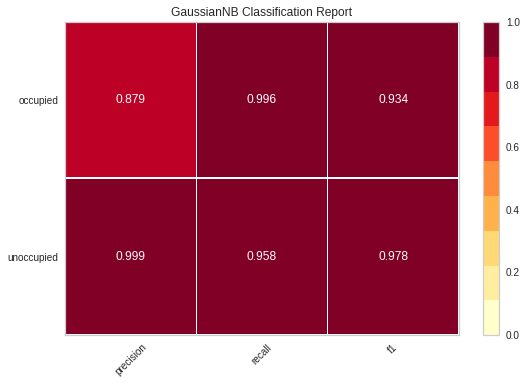

In [11]:
# Instantiate the classification model and visualizer 
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

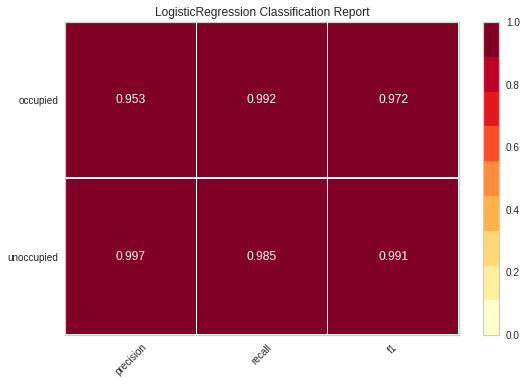

In [12]:
bayes = LogisticRegression()
visualizer = ClassificationReport(bayes, classes=classes)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

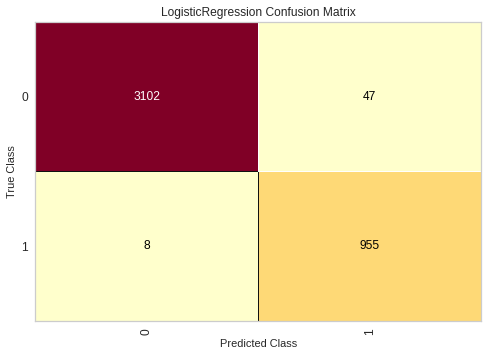

In [13]:
logReg = LogisticRegression()
visualizer = ConfusionMatrix(logReg)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
g = visualizer.poof()

## Let's work on a different data set

In [14]:
concrete_data = pd.read_csv('https://raw.githubusercontent.com/parulnith/Analysing-Machine-Learning-Models-with-Yellowbrick/master/data/concrete/concrete.csv')
concrete_data.head()

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [15]:
feature_names_reg = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name_reg = 'strength'
# Get the X and y data from the DataFrame 
X_reg = concrete_data[feature_names_reg]
y_reg = concrete_data[target_name_reg]
# Create the train and test data 
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2)

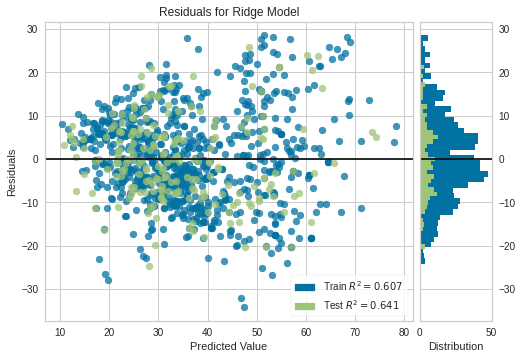

In [16]:
from sklearn import linear_model
from yellowbrick.regressor import ResidualsPlot

model = linear_model.Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(X_reg_train, y_reg_train) 
visualizer.score(X_reg_test, y_reg_test) 
g = visualizer.poof()

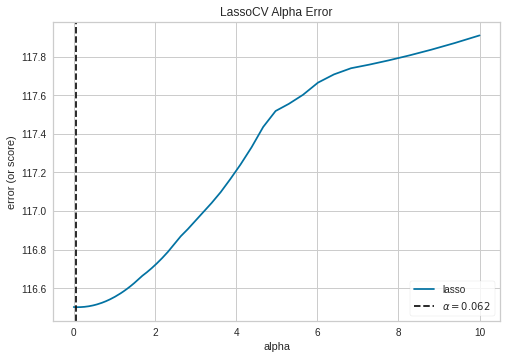

In [17]:
import numpy as np
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_reg_train, y_reg_train)
g = visualizer.poof()